In [6]:
import numpy as np
import pandas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import os
os.environ["LANG"] = "en_US.UTF-8"
import chromedriver_autoinstaller
import matplotlib.pyplot as plt
import bs4
import requests
from unidecode import unidecode
import re

In [2]:
star_list = ['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalís', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakoraka', 'Athebyne', 'Atik', 'Atlas', 'Atria', 'Avior', 'Axólotl', 'Ayeyarwady', 'Azelfafage', 'Azha', 'Azmidi', 'Baekdu', "Barnard's Star", 'Baten Kaitos', 'Beemim', 'Beid', 'Belel', 'Bellatrix', 'Berehynia', 'Betelgeuse', 'Bharani', 'Bibhā', 'Biham', 'Bosona', 'Botein', 'Brachium', 'Bubup', 'Buna', 'Bunda', 'Bélénos', 'Canopus', 'Capella', 'Caph', 'Castor', 'Castula', 'Cebalrai', 'Ceibo', 'Celaeno', 'Cervantes', 'Chalawan', 'Chamukuy', 'Chaophraya', 'Chara', 'Chasoň', 'Chechia', 'Chertan', 'Citadelle', 'Citalá', 'Cocibolca', 'Copernicus', 'Cor Caroli', 'Cujam', 'Cursa', 'Dabih', 'Dalim', 'Deneb', 'Deneb Algedi', 'Denebola', 'Diadem', 'Dingolay', 'Diphda', 'Diya', 'Dofida', 'Dombay', 'Dschubba', 'Dubhe', 'Dziban', 'Dìwö', 'Ebla', 'Edasich', 'Electra', 'Elgafar', 'Elkurud', 'Elnath', 'Eltanin', 'Emiw', 'Enif', 'Errai', 'Fafnir', 'Fang', 'Fawaris', 'Felis', 'Felixvarela', 'Flegetonte', 'Fomalhaut', 'Formosa', 'Franz', 'Fulu', 'Fumalsamakah', 'Funi', 'Furud', 'Fuyue', 'Gacrux', 'Gakyid', 'Geminga', 'Giausar', 'Gienah', 'Ginan', 'Gloas', 'Gomeisa', 'Grumium', 'Gudja', 'Gumala', 'Guniibuu', 'Hadar', 'Haedus', 'Hamal', 'Hassaleh', 'Hatysa', 'Helvetios', 'Heze', 'Hoggar', 'Homam', 'Horna', 'Hunahpú', 'Hunor', 'Iklil', 'Illyrian', 'Imai', 'Inquill', 'Intan', 'Intercrus', 'Irena', 'Itonda', 'Izar', 'Jabbah', 'Jishui', 'Kaffaljidhma', 'Kalausi', 'Kamuy', 'Kang', 'Karaka', 'Kaus Australis', 'Kaus Borealis', 'Kaus Media', 'Kaveh', 'Keid', 'Khambalia', 'Kitalpha', 'Kochab', 'Koeia', 'Koit', 'Kornephoros', 'Kraz', 'Kurhah', 'La Superba', 'Larawag', 'Lerna', 'Lesath', 'Libertas', 'Lich', 'Liesma', 'Lilii Borea', 'Lionrock', 'Lucilinburhuc', 'Lusitânia', 'Maasym', 'Macondo', 'Mago', 'Mahasim', 'Mahsati', 'Maia', 'Malmok', 'Marfik', 'Markab', 'Markeb', 'Marsic', 'Matar', 'Mazaalai', 'Mebsuta', 'Megrez', 'Meissa', 'Mekbuda', 'Meleph', 'Menkalinan', 'Menkar', 'Menkent', 'Menkib', 'Merak', 'Merga', 'Meridiana', 'Merope', 'Mesarthim', 'Miaplacidus', 'Mimosa', 'Minchir', 'Minelauva', 'Mintaka', 'Mira', 'Mirach', 'Miram', 'Mirfak', 'Mirzam', 'Misam', 'Mizar', 'Moldoveanu', 'Montuno', 'Morava', 'Moriah', 'Mothallah', 'Mouhoun', 'Mpingo', 'Muliphein', 'Muphrid', 'Muscida', 'Musica', 'Muspelheim', 'Márohu', 'Mönch', 'Nahn', 'Naledi', 'Naos', 'Nashira', 'Natasha', 'Nekkar', 'Nembus', 'Nenque', 'Nervia', 'Nihal', 'Nikawiy', 'Nosaxa', 'Nunki', 'Nusakan', 'Nushagak', 'Nyamien', 'Násti', 'Ogma', 'Okab', 'Paikauhale', 'Parumleo', 'Peacock', 'Petra', 'Phact', 'Phecda', 'Pherkad', 'Phoenicia', 'Piautos', 'Pincoya', 'Pipirima', 'Pipoltr', 'Pleione', 'Poerava', 'Polaris', 'Polaris Australis', 'Polis', 'Pollux', 'Porrima', 'Praecipua', 'Prima Hyadum', 'Procyon', 'Propus', 'Proxima Centauri', 'Epsilon Eridani', 'Rana', 'Rapeto', 'Rasalas', 'Rasalgethi', 'Rasalhague', 'Rastaban', 'Regulus', 'Revati', 'Rigel', 'Rigil Kentaurus', 'Rosaliadecastro', 'Rotanev', 'Ruchbah', 'Rukbat', 'Sabik', 'Saclateni', 'Sadachbia', 'Sadalbari', 'Sadalmelik', 'Sadalsuud', 'Sadr', 'Sagarmatha', 'Saiph', 'Salm', 'Sansuna', 'Sargas', 'Sarin', 'Sceptrum', 'Scheat', 'Schedar', 'Secunda Hyadum', 'Segin', 'Seginus', 'Sham', 'Shama', 'Sharjah', 'Shaula', 'Sheliak', 'Sheratan', 'Sika', 'Sirius', 'Situla', 'Skat', 'Solaris', 'Spica', 'Sterrennacht', 'Stribor', 'Sualocin', 'Subra', 'Suhail', 'Sulafat', 'Syrma', 'Sāmaya', 'Tabit', 'Taika', 'Taiyangshou', 'Taiyi', 'Talitha', 'Tangra', 'Tania Australis', 'Tania Borealis', 'Tapecue', 'Tarazed', 'Tarf', 'Taygeta', 'Tegmine', 'Tejat', 'Terebellum', 'Tevel', 'Theemin', 'Thuban', 'Tiaki', 'Tianguan', 'Tianyi', 'Timir', 'Tislit', 'Titawin', 'Tojil', 'Toliman', 'Tonatiuh', 'Torcular', 'Tuiren', 'Tupi', 'Tupã', 'Tureis', 'Ukdah', 'Uklun', 'Unukalhai', 'Unurgunite', 'Uruk', 'Vega', 'Veritate', 'Vindemiatrix', 'Wasat', 'Wazn', 'Wezen', 'Wurren', 'Xamidimura', 'Xihe', 'Xuange', 'Yed Posterior', 'Yed Prior', 'Yildun', 'Zaniah', 'Zaurak', 'Zavijava', 'Zhang', 'Zibal', 'Zosma', 'Zubenelgenubi', 'Zubenelhakrabi', 'Zubeneschamali']
def replace_special_characters(text):
    # Replace special characters with their closest ASCII equivalent
    text_ascii = unidecode(text)
    
    # Remove any remaining non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\'.,?!]', '', text_ascii)
    
    return cleaned_text
for i in range(len(star_list)): # Replace special characters so SIMBAD can find it
    star_list[i] = replace_special_characters(star_list[i])
print(star_list)
star_list.sort()
not_found = ["Acrab", "Alya", "Dabih", "Geminga", "Lich", "Marsic", "Mazaalai", "Pipoltr"]

['Absolutno', 'Acamar', 'Achernar', 'Achird', 'Acrab', 'Acrux', 'Acubens', 'Adhafera', 'Adhara', 'Adhil', 'Epsilon Tauri', 'Ainalrami', 'Aladfar', 'Alasia', 'Albaldah', 'Albali', 'Albireo', 'Alchiba', 'Alcor', 'Alcyone', 'Aldebaran', 'Alderamin', 'Aldhanab', 'Aldhibah', 'Aldulfin', 'Alfirk', 'Algedi', 'Algenib', 'Algieba', 'Algol', 'Algorab', 'Alhena', 'Alioth', 'Aljanah', 'Alkaid', 'Alkalurops', 'Alkaphrah', 'Alkarab', 'Alkes', 'Almaaz', 'Almach', 'Alnair', 'Alnasl', 'Alnilam', 'Alnitak', 'Alniyat', 'Alphard', 'Alphecca', 'Alpheratz', 'Alpherg', 'Alrakis', 'Alrescha', 'Alruba', 'Alsafi', 'Alsciaukat', 'Alsephina', 'Alshain', 'Alshat', 'Altair', 'Altais', 'Alterf', 'Aludra', 'Alula Australis', 'Alula Borealis', 'Alya', 'Alzirr', 'Amadioha', 'Amansinaya', 'Anadolu', 'Ancha', 'Angetenar', 'Aniara', 'Ankaa', 'Anser', 'Antares', 'Arcalis', 'Arcturus', 'Arkab Posterior', 'Arkab Prior', 'Arneb', 'Ascella', 'Asellus Australis', 'Asellus Borealis', 'Ashlesha', 'Aspidiske', 'Asterope', 'Atakora

In [7]:
# load distances.npy and make it into a list and then put it in distances.txt
distances = np.load("distances.npy")
distances = distances.tolist()
# write distances to distances.txt
with open("distances.txt", "w") as f:
    for i in distances:
        f.write(str(i) + "\n")

In [5]:
if not (os.path.exists("distances.txt") and os.path.exists("image_urls.txt") and os.path.exists("star_data.csv") and os.path.exists("Star Images") and len(os.listdir("Star Images")) != 0 and len(os.listdir("Star Images")) == len(star_list) - len(not_found)):
    chromedriver_autoinstaller.install()
    options = Options()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)

    print("Getting images and distances in Chrome...")

    image_urls = []
    distances = []

    already_done = [file[:-4] for file in os.listdir("Star Images")]
    already_done.sort()

    for star in star_list:
        if star not in not_found:
            image_urls.append(f"https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object={star}&format=jpg")
            with open("image_urls.txt", "w") as image_urls_file:
                for i in range(len(image_urls)):
                    image_urls_file.write(image_urls[i] + ("\n" if i != len(distances) - 1 else ""))
            # read in distances_file and convert to list
            preloaded_distances = []
            with open("distances.txt", "r") as distances_file:
                preloaded_distances = [float(line.strip()) for line in distances_file.readlines()]
        if star in already_done or star in not_found:
            continue

        print(f"Getting {star}...")
        driver.get(f"http://simbad.u-strasbg.fr/simbad/sim-basic?Ident={star}&submit=SIMBAD+search")
        try:
            element = driver.find_element(By.XPATH, '/html/body/div[4]/table[3]/tbody/tr[2]/td[2]/table/tbody/tr[2]/td/div/meta')

            distance = 1 / (float(driver.find_element(By.XPATH, '//*[@id="basic_data"]/table/tbody/tr[8]/td[2]/b[1]/tt').text.split(" ")[0]) / 1000)

            image_url = f"https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object={star}&format=jpg"

            image_urls.append(image_url)
            distances.append(distance)
            img_data = requests.get(image_url).content
            with open(f'Star Images/{star}.jpg', 'wb') as handler:
                handler.write(img_data)
        except NoSuchElementException:
            print(f"Could not find image/distance for {star}. Moving on to the next one...")

        # print("Image URL:", image_url)
        # print("Distance: " + str(distance) + " pc")

    # Close the WebDriver
    driver.quit()

    print(image_urls)
    print(distances)

    with open("image_urls.txt", "w") as image_urls_file:
        for i in range(len(image_urls)):
            image_urls_file.write(image_urls[i] + ("\n" if i != len(distances) - 1 else ""))

    if preloaded_distances != [] and len(preloaded_distances) == len(distances):
        distances = preloaded_distances
    with open("distances.txt", "w") as distances_file:
        for i in range(len(distances)):
            distances_file.write(str(distances[i]) + ("\n" if i != len(distances) - 1 else ""))
else:
    print("Skipping this step because the files already exist.")

Getting images and distances in Chrome...
['https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Absolutno&format=jpg', 'https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Acamar&format=jpg', 'https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Achernar&format=jpg', 'https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Achird&format=jpg', 'https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Acrux&format=jpg', 'https:/

In [10]:
images_file = open("image_urls.txt")
distances_file = open("distances.txt")

image_urls_list = images_file.read().split("\n")
distances_list = distances_file.read().split("\n")

# combine star name with the exception of those in the not_found list, image urls, and distances into a csv file
star_data = pandas.DataFrame({
    "Star Name": [star for star in star_list if star not in not_found],
    "Distance (pc)": distances_list,
    "Image URL": image_urls_list
})

star_data.sort_values(by=["Star Name"], inplace=True)
star_data.to_csv("star_data.csv", index=False)

In [11]:
# # Change the star data where star name is "Ran" to "Epsilon Eridani"
# star_data.loc[star_data["Star Name"] == "Ran", "Star Name"] = "Epsilon Eridani"
# # Replace the distance with the correct value
# star_data.loc[star_data["Star Name"] == "Epsilon Eridani", "Distance (pc)"] = 3.219810333852474
# # Replace the Image URL with the correct one
# star_data.loc[star_data["Star Name"] == "Epsilon Eridani", "Image URL"] = "https://alasky.u-strasbg.fr/hips-image-services/hips2fits?hips=CDS%2FP%2FDSS2%2Fcolor&width=500&height=500&fov=1&projection=SIN&coordsys=icrs&rotation_angle=0.0&object=Epsilon+Eridani&format=jpg"
# Write out each column to a separate file
# star_data.sort_values(by=["Star Name"], inplace=True)
# star_data["Distance (pc)"].to_csv("distances.txt", index=False)
# star_data["Image URL"].to_csv("image_urls.txt", index=False)
# star_data.to_csv("star_data.csv", index=False)
star_data

,Star Name,Distance (pc),Image URL
0,Absolutno,273.84505846592,https://alasky.u-strasbg.fr/hips-image-service...
1,Acamar,49.431537320810676,https://alasky.u-strasbg.fr/hips-image-service...
2,Achernar,42.75331338178709,https://alasky.u-strasbg.fr/hips-image-service...
3,Achird,5.923040746966515,https://alasky.u-strasbg.fr/hips-image-service...
4,Acrux,98.71668311944718,https://alasky.u-strasbg.fr/hips-image-service...
...,...,...,...
438,Zibal,36.50301149844862,https://alasky.u-strasbg.fr/hips-image-service...
439,Zosma,17.914725904693658,https://alasky.u-strasbg.fr/hips-image-service...
440,Zubenelgenubi,23.239600278875205,https://alasky.u-strasbg.fr/hips-image-service...
441,Zubenelhakrabi,50.025012506253134,https://alasky.u-strasbg.fr/hips-image-service...


In [12]:
from PIL import Image
import os, sys
import cv2
import numpy as np

'''
Converts all images in a directory to '.npy' format.
Use np.save and np.load to save and load the images.
Use it for training your neural networks in ML/DL projects. 
'''

# Path to image directory
path = "./Star Images/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item) and item.endswith(".jpg"):
            im = Image.open(path+item).convert("RGB")
            im = np.array(im)
            x_train.append(im)

if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    imgset = np.array(x_train)
    np.save("images.npy", imgset)

    # Get the distances and save them as an .npy file as well
    distances = np.array([float(i) for i in list(star_data["Distance (pc)"])])
    np.save("distances.npy", distances)

In [13]:
image_data = np.load("images.npy")
distance_data = np.load("distances.npy", allow_pickle=True)
image_data.shape, distance_data.shape

((443, 500, 500, 3), (443,))

In [40]:
from skimage import color
gray_images = []
for image in image_data:
    # scale the image down to 64x64
    image = cv2.resize(image, (64, 64))
    gray_images.append(color.rgb2gray(image))
gray_images = np.array(gray_images)
np.save("gray_images.npy", gray_images)

In [41]:
gray_images = np.load("gray_images.npy")
gray_images.shape

(443, 64, 64)

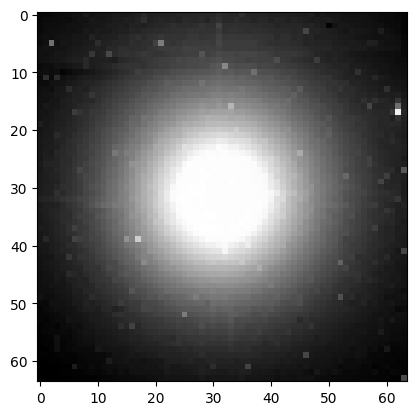

In [42]:
plt.imshow(gray_images[2], cmap="gray")

In [43]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(gray_images, distance_data, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 64, 64), (89, 64, 64), (354,), (89,))

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

In [66]:
batch_size = 443
epochs = 100
# input image dimensions
img_rows, img_cols = 64, 64
#inputshape = X.shape[1]

In [67]:
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (354, 64, 64, 1)
354 train samples
89 test samples


In [68]:
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

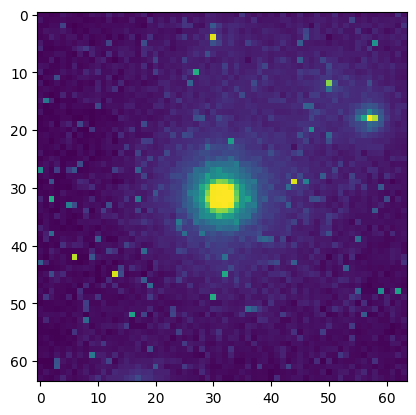

In [69]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].reshape(64, 64))

In [108]:
model = Sequential()
# model.add(Dense(256, activation='relu', input_dim=64))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_26 (Flatten)        (None, 61504)             0         
                                                                 
 dense_111 (Dense)           (None, 512)               31490560  
                                                                 
 dense_112 (Dense)           (None, 256)               131328    
                                                                 
 dense_113 (Dense)           (None, 128)               32896     
                                                     

In [109]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/100


2023-09-04 12:46:46.541841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-09-04 12:46:48.452216: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 - 3s - loss: 27098.0508 - r2_keras: -7.6101e-01 - val_loss: 1402370.3750 - val_r2_keras: -3.1494e-02 - 3s/epoch - 3s/step
Epoch 2/100
1/1 - 0s - loss: 23794.6270 - r2_keras: -5.4633e-01 - val_loss: 1391493.8750 - val_r2_keras: -2.3494e-02 - 264ms/epoch - 264ms/step
Epoch 3/100
1/1 - 0s - loss: 20456.2734 - r2_keras: -3.2938e-01 - val_loss: 1378529.3750 - val_r2_keras: -1.3958e-02 - 236ms/epoch - 236ms/step
Epoch 4/100
1/1 - 0s - loss: 17410.4922 - r2_keras: -1.3145e-01 - val_loss: 1363745.7500 - val_r2_keras: -3.0844e-03 - 153ms/epoch - 153ms/step
Epoch 5/100
1/1 - 0s - loss: 15850.1621 - r2_keras: -3.0048e-02 - val_loss: 1350733.8750 - val_r2_keras: 0.0065 - 164ms/epoch - 164ms/step
Epoch 6/100
1/1 - 0s - loss: 17549.5605 - r2_keras: -1.4049e-01 - val_loss: 1347645.6250 - val_r2_keras: 0.0088 - 153ms/epoch - 153ms/step
Epoch 7/100
1/1 - 0s - loss: 18592.8047 - r2_keras: -2.0828e-01 - val_loss: 1349346.1250 - val_r2_keras: 0.0075 - 150ms/epoch - 150ms/step
Epoch 8/100
1/1 - 0s - lo

3/3 - 0s - loss: 1352277.5000 - r2_keras: 0.0179 - 67ms/epoch - 22ms/step
3/3 [==============================] - 0s 11ms/step


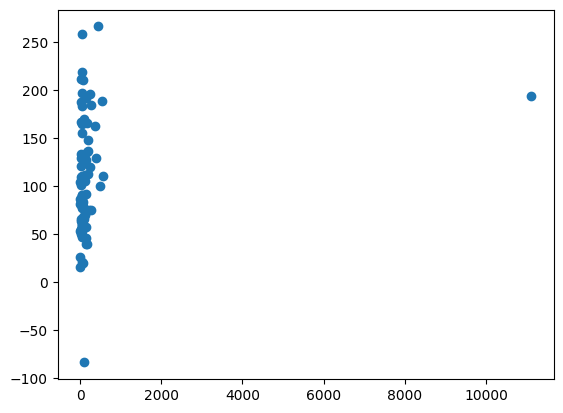

In [112]:
score = model.evaluate(X_test, y_test, verbose=2)
preds = model.predict(X_test)
preds = preds[:,0]
plt.scatter(y_test, preds)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

-7.705642531299148